# Creating a graph

# nodes

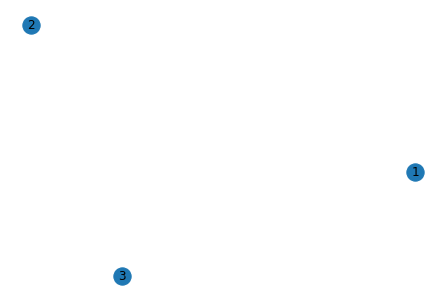

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
G=nx.Graph()
G.add_node(1)
G.add_nodes_from([2,3])

nx.draw(G, with_labels=True) 
plt.show(nx)

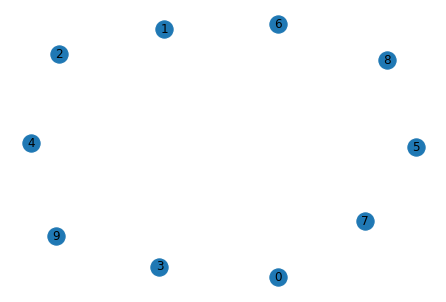

In [3]:
G=nx.Graph()
H=nx.path_graph(10)
G.add_nodes_from(H)
nx.draw(G, with_labels=True) 
plt.show(nx)

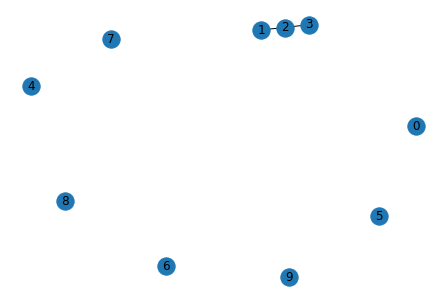

In [4]:
G.add_edge(1,2)
e=(2,3)
G.add_edge(*e) # unpack edge tuple*
nx.draw(G, with_labels=True) 
plt.show(nx)

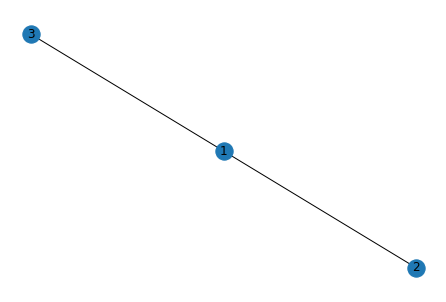

In [5]:
G=nx.Graph()
G.add_node(1)
G.add_nodes_from([2,3])
G.add_edges_from([(1,2),(1,3)])
nx.draw(G,with_labels=True)
plt.show(nx)

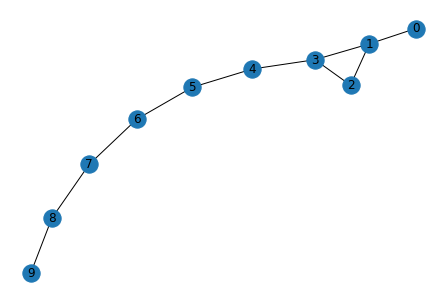

In [6]:
G.add_edges_from(H.edges())
nx.draw(G,with_labels=True)
plt.show(nx)

G.remove_node(H)
G.clear()

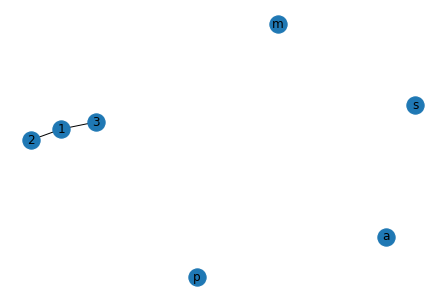

In [7]:
G=nx.Graph()
G.add_edges_from([(1,2),(1,3)])
#G.add_node("spam")       # adds node "spam"
G.add_nodes_from("spam") # adds 4 nodes: 's', 'p', 'a', 'm'
nx.draw(G,with_labels=True)
plt.show(nx)

# Edges

In [8]:
G.number_of_nodes()

7

In [9]:
G.number_of_edges()

2

In [10]:
G.nodes()

NodeView((1, 2, 3, 's', 'p', 'a', 'm'))

In [11]:
G.edges()

EdgeView([(1, 2), (1, 3)])

In [12]:
G.neighbors(1)

In [13]:
G.remove_nodes_from("spam")
G.nodes()

NodeView((1, 2, 3))

In [14]:
H=nx.DiGraph(G) # create a DiGraph using the connections from G
H.edges()

OutEdgeView([(1, 2), (1, 3), (2, 1), (3, 1)])

In [15]:
edgelist=[(0,1),(1,2),(2,3)]
H=nx.Graph(edgelist)
H.nodes()

NodeView((0, 1, 2, 3))

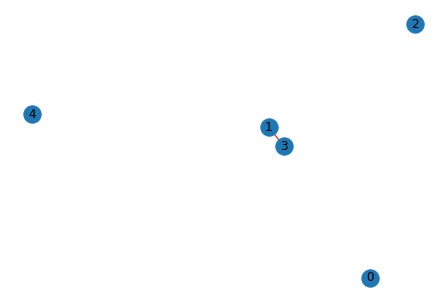

In [16]:
G=nx.Graph()
H=nx.path_graph(5)
G.add_nodes_from(H)
G.add_edge(1,3)
nx.draw(G,with_labels=True, edge_color='r')
plt.show(nx)

## something

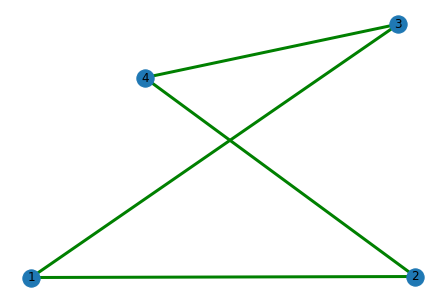

In [17]:
FG=nx.Graph()
FG.add_weighted_edges_from([(1,2,0.125),(1,3,0.75),(2,4,1.2),(3,4,0.375)])
nx.draw(FG,with_labels=True, width=3, edge_color='g')
plt.show(nx)

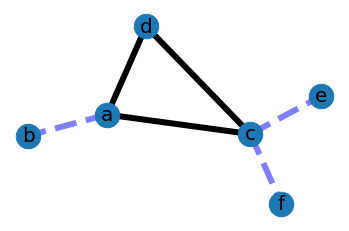

In [18]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=600)

# edges
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show(nx)

# Directed graphs

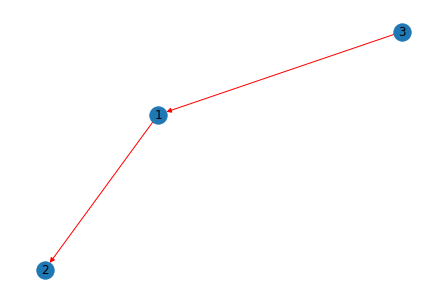

In [19]:
DG=nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5), (3,1,0.75)])
nx.draw(DG,with_labels=True, edge_color='r')
plt.show()

In [20]:
DG.out_degree(1,weight='weight')

0.5

In [21]:
DG.degree(1,weight='weight')

1.25

In [22]:
DG.successors(1)

In [23]:
DG.neighbors(1)

In [24]:
H = nx.Graph(DG) # convert G to undirected graph
H.edges()

EdgeView([(1, 2), (1, 3)])

In [25]:
H.nodes()

NodeView((1, 2, 3))

# Analyzing graphs

In [32]:
G=nx.Graph()
G.add_edges_from([(1,2),(1,3)])
G.add_node("spam")

In [33]:
nx.connected_components(G)

<generator object connected_components at 0x7f6c416f97d0>

In [34]:
sorted(nx.degree(G).values())

AttributeError: 'DegreeView' object has no attribute 'values'

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
#import math
import csv
#import random as rand
import sys

def buildG(G, file_, delimiter_):
    #construct the weighted version of the contact graph from cgraph.dat file
    reader = csv.reader(open(file_), delimiter=delimiter_)
    for line in reader:
        if float(line[2]) != 0.0:
            G.add_edge(int(line[0]),int(line[1]),weight=float(line[2]))

def main():
    graph_fn="tempset3.txt";
    G = nx.Graph()  #let's create the graph first
    buildG(G, graph_fn, ',')

    print G.nodes()
    print G.number_of_nodes()

    #nx.draw(G)
    #plt.show(G)

    n = G.number_of_nodes()
    print ("no of nodes: ", n)
    comps=nx.connected_components(G)
    print comps

main()